In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import io
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
file_path = '1719219914-Analysis of Super Store - DA (1).csv'
data = pd.read_csv(file_path)

In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [ ]:
data = data.dropna()

In [ ]:
data = data.drop_duplicates()

In [ ]:
data['Postal Code'] = data['Postal Code'].astype(str)

In [ ]:
data['Profit Margin'] = data['Profit'] / data['Sales']

In [ ]:
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]

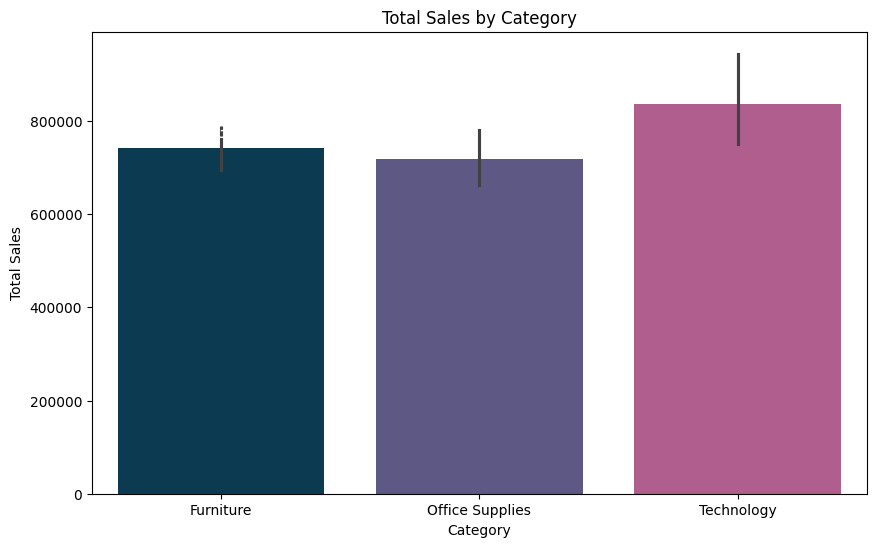

In [ ]:
# 1. Sales by Category
plt.figure(figsize=(10, 6))
categories = data['Category'].unique()

barplot = sns.barplot(x='Category', y='Sales', data=data, estimator=np.sum, palette=colors[:len(categories)], hue='Category', dodge=False)

plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')

for p in barplot.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.annotate(f'{height}', (x, y + height * 1.02), ha='left', va='bottom', color='white', fontsize=12, rotation=0)

plt.rcParams['figure.facecolor'] = 'none'

plt.show()

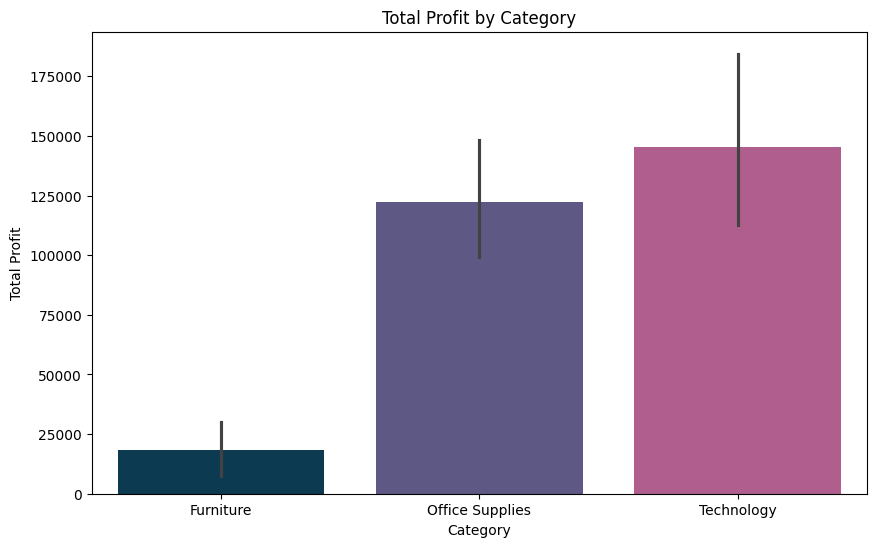

In [ ]:
# 2. Profit by Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Profit', data=data, estimator=np.sum, palette=colors[:len(categories)], hue='Category', dodge=False)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.legend([],[], frameon=False)
plt.show()

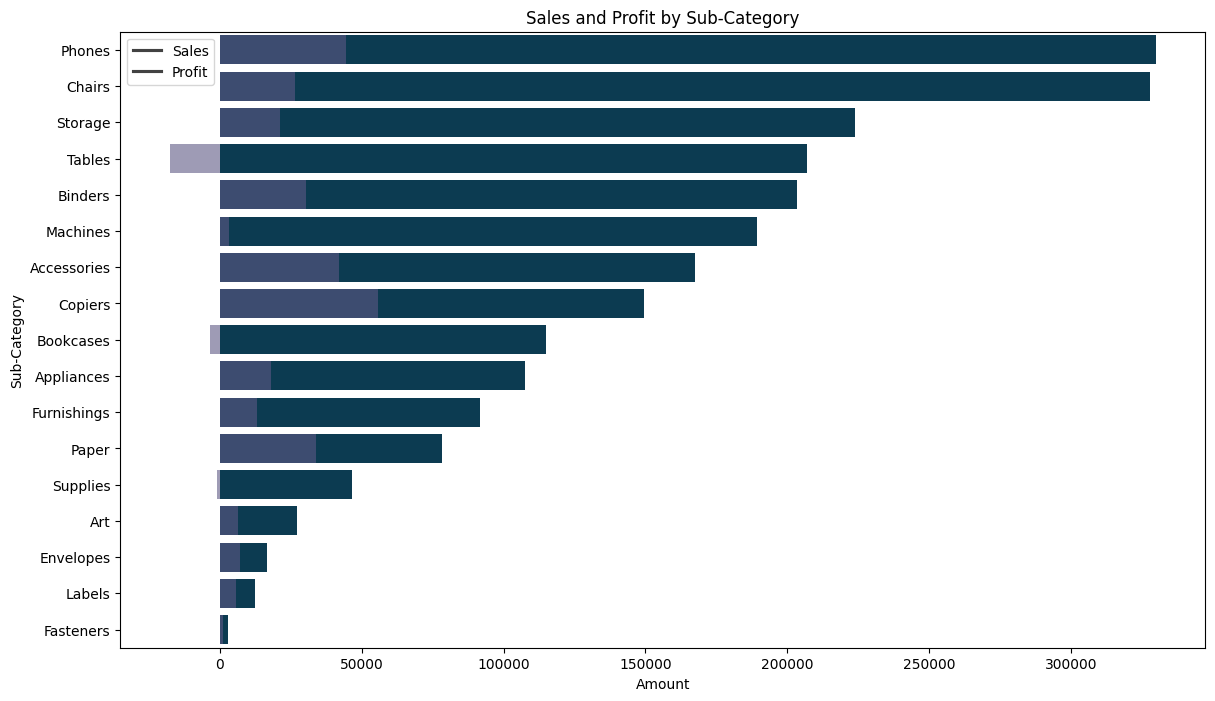

In [ ]:
# 3. Sales and Profit by Sub-Category
plt.figure(figsize=(14, 8))
subcat_sales_profit = data.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
subcat_sales_profit = subcat_sales_profit.sort_values('Sales', ascending=False)
subcat_colors = sns.color_palette(colors, len(subcat_sales_profit))
sns.barplot(x='Sales', y='Sub-Category', data=subcat_sales_profit, color=subcat_colors[0])
sns.barplot(x='Profit', y='Sub-Category', data=subcat_sales_profit, color=subcat_colors[1], alpha=0.6)
plt.title('Sales and Profit by Sub-Category')
plt.xlabel('Amount')
plt.ylabel('Sub-Category')
plt.legend(['Sales', 'Profit'])
plt.show()

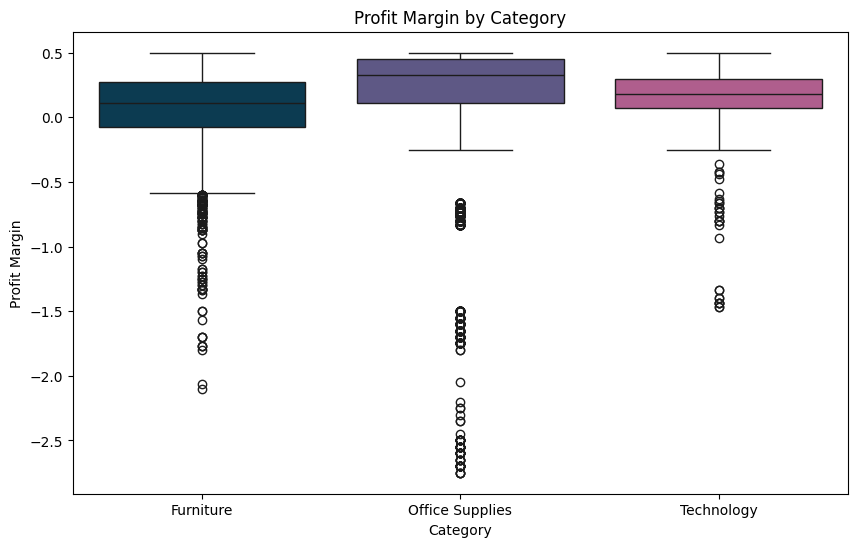

In [ ]:
# 4. Profit Margin by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit Margin', data=data, palette=colors[:len(categories)], hue='Category', dodge=False)
plt.title('Profit Margin by Category')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.legend([],[], frameon=False)
plt.show()

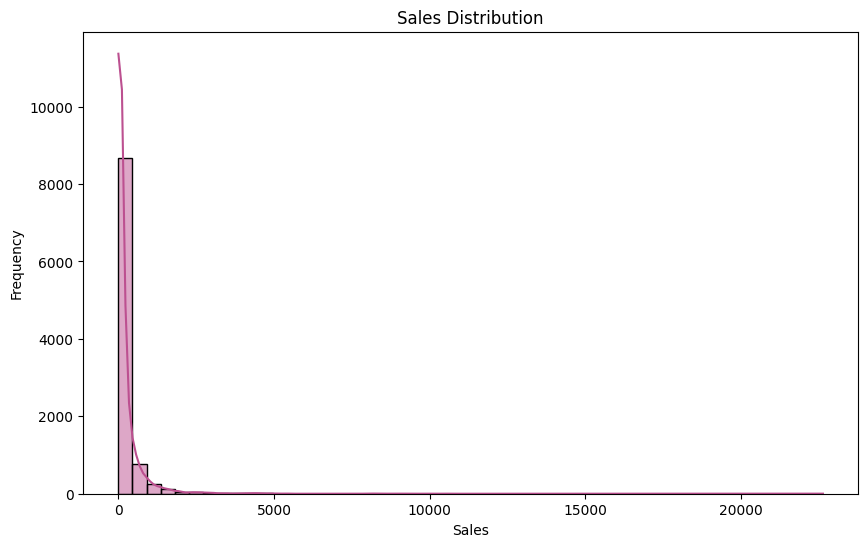

In [ ]:
# 5. Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sales'], bins=50, kde=True, color=colors[2])
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

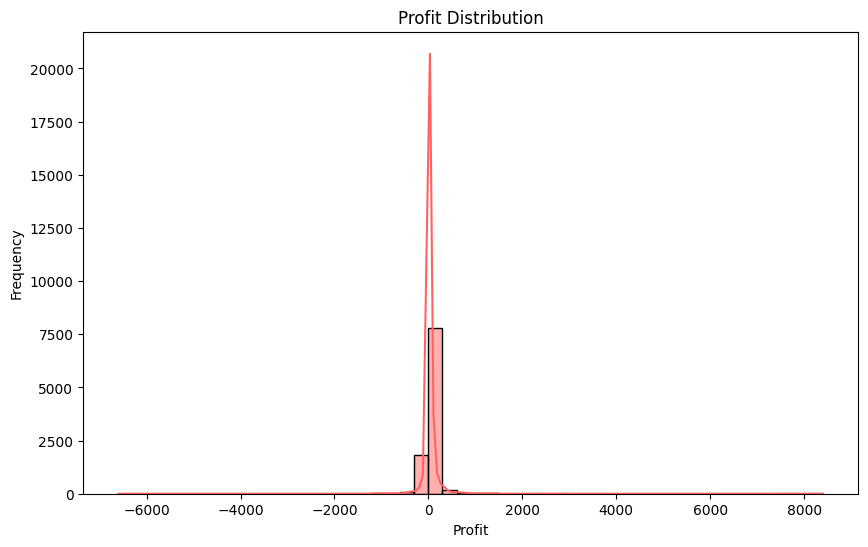

In [ ]:
# 6. Profit Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Profit'], bins=50, kde=True, color=colors[3])
plt.title('Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()